In [55]:
# Import the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into Pandas DataFrames
data = pd.read_csv('call center dataset.csv')
data.head()

,date,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,day_name
0,2023-01-08,5,12,13,3,9,4,6,4,26,...,11,16,11,19,12,7,17,10,10,Minggu
1,2023-01-09,8,8,1,5,4,13,5,4,41,...,14,15,6,8,9,8,13,10,9,Senin
2,2023-01-10,3,0,2,8,6,13,8,11,38,...,11,17,11,11,9,17,12,5,5,Selasa
3,2023-01-11,11,12,7,8,13,2,9,13,22,...,7,11,7,5,6,14,1,12,14,Rabu
4,2023-01-12,2,1,14,5,7,10,14,13,19,...,14,6,9,9,17,9,4,10,14,Kamis


In [56]:
data = pd.read_csv('call center dataset.csv', index_col='date', parse_dates=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,day_name
date,,,,,,,,,,,,,,,,,,,,,
2023-01-08,5,12,13,3,9,4,6,4,26,24,...,11,16,11,19,12,7,17,10,10,Minggu
2023-01-09,8,8,1,5,4,13,5,4,41,17,...,14,15,6,8,9,8,13,10,9,Senin
2023-01-10,3,0,2,8,6,13,8,11,38,26,...,11,17,11,11,9,17,12,5,5,Selasa
2023-01-11,11,12,7,8,13,2,9,13,22,33,...,7,11,7,5,6,14,1,12,14,Rabu
2023-01-12,2,1,14,5,7,10,14,13,19,32,...,14,6,9,9,17,9,4,10,14,Kamis


In [57]:
# Create a dictionary to map Indonesian day names to English day names
day_mapping = {
    'Senin': 'Monday',
    'Selasa': 'Tuesday',
    'Rabu': 'Wednesday',
    'Kamis': 'Thursday',
    'Jumat': 'Friday',
    'Sabtu': 'Saturday',
    'Minggu': 'Sunday'
}

In [58]:
# Replace the day names in the 'day_name' column with their English counterparts
data['day_name'] = data['day_name'].map(day_mapping)

In [59]:
# Create a list named day_order with the days of the week in chronological order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [60]:
# Calculate the average of columns 0 to 23 for each day of the week.
hour_columns = [str(i) for i in range(0, 24)]
average_calls = data.groupby('day_name')[hour_columns].mean()

In [61]:
# Sort the average_calls DataFrame according to the day_order list
average_calls = average_calls.reindex(day_order)

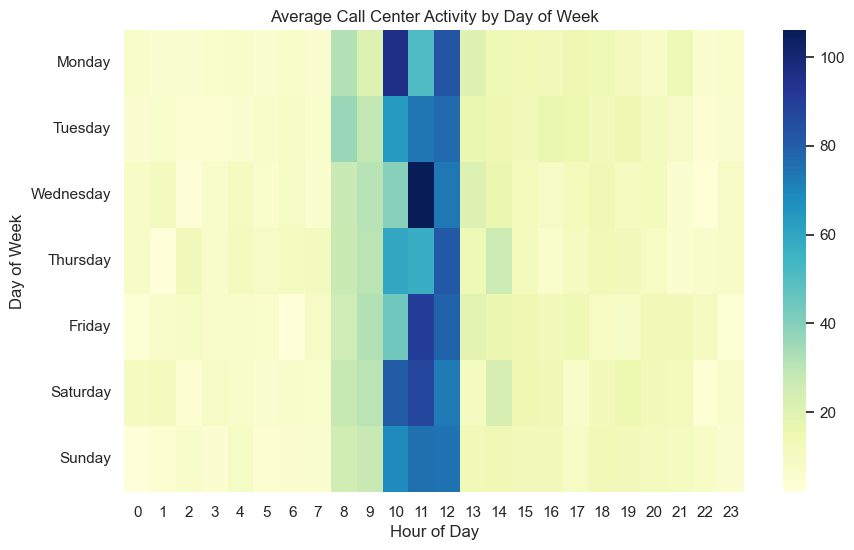

In [62]:
# Set the default Seaborn style for charts
sns.set()
plt.figure(figsize=(10, 6))
sns.heatmap(data=average_calls, cmap='YlGnBu')

plt.title('Average Call Center Activity by Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

Insights:
Berdasarkan analisis heatmap, dapat dilihat bahwa jam panggilan sibuk adalah antara jam 10 - 12 pagi di setiap harinya, dengan waktu tersibuk adalah hari Rabu jam 11 pagi dibandingkan hari dan jam lainnya. Slot waktu ini menuntut perhatian khusus dan alokasi sumber daya untuk memastikan penanganan panggilan dan pertanyaan pelanggan yang efisien.
Wawasan ini memberikan informasi berharga bagi manajemen pusat panggilan untuk menjadwalkan staf, menerapkan program pelatihan yang ditargetkan, dan mengoptimalkan operasi layanan pelanggan selama jam panggilan sibuk, terutama pada hari Rabu pukul 11.00.
